In [163]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [164]:
df=pd.read_csv("cars.csv")
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


## Data Preprocessing Part 1

In [165]:
df.shape

(56244, 12)

In [166]:
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [167]:
#Dropping the columns that are not needed for the analysis 
df.drop(columns=['model','segment'],inplace= True)

In [168]:
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [169]:
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

 since there are so many car makes, and it is difficult to analyze them individually, so i will group them into categories:
 Luxury European, Mainstream European, Russian/Eastern European, Asian, American, Scpeciality, and other. The grouping is done on the basis of the the origin of the car.

In [170]:
# categorising the car make 
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche', 'bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Speciality'
    else:
        return 'Other'
    
df['make_segment'] = df['make'].apply(car_make)

In [171]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


descriptive statistics

In [172]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


 ## Exploratory Data Analysis
 In the exploratory data analysis, I will analyze the relationship between the target variable and the indepedent variables. I will also analyze the relationship between the indepenadent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

## Car Make Segment

In [173]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


In [174]:
df['make_segment'].value_counts()

make_segment
Mainstream European         20328
Luxury European             14404
Asian                       11246
Other                        4381
American                     4145
Russian/Eastern European     1534
Speciality                    206
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Speciality'),
  Text(6, 0, 'Asian')])

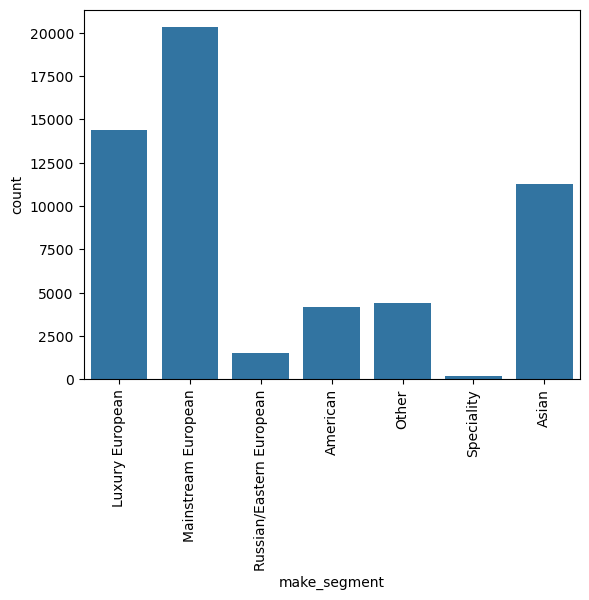

In [175]:
sns.countplot(x='make_segment', data=df)
plt.xticks(rotation=90)


In this Dataset, most of the cars are European (particular;y majoority of the luxury followed by Mainstream and Russian/Eastern European). However the dataset also has american as well asian cars. There are also some speciality cars such as Tesla, McLaren, Bently,etc. The dataset also has some cars that are not categorized into any of thr above categories.

## Categorical variable dustributiom

In [176]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


In [177]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


checking for the categorical columns

In [178]:

for column in df.columns:
    if df[column].dtype=='O':
        print (column)


make
condition
fuel_type
color
transmission
drive_unit
make_segment


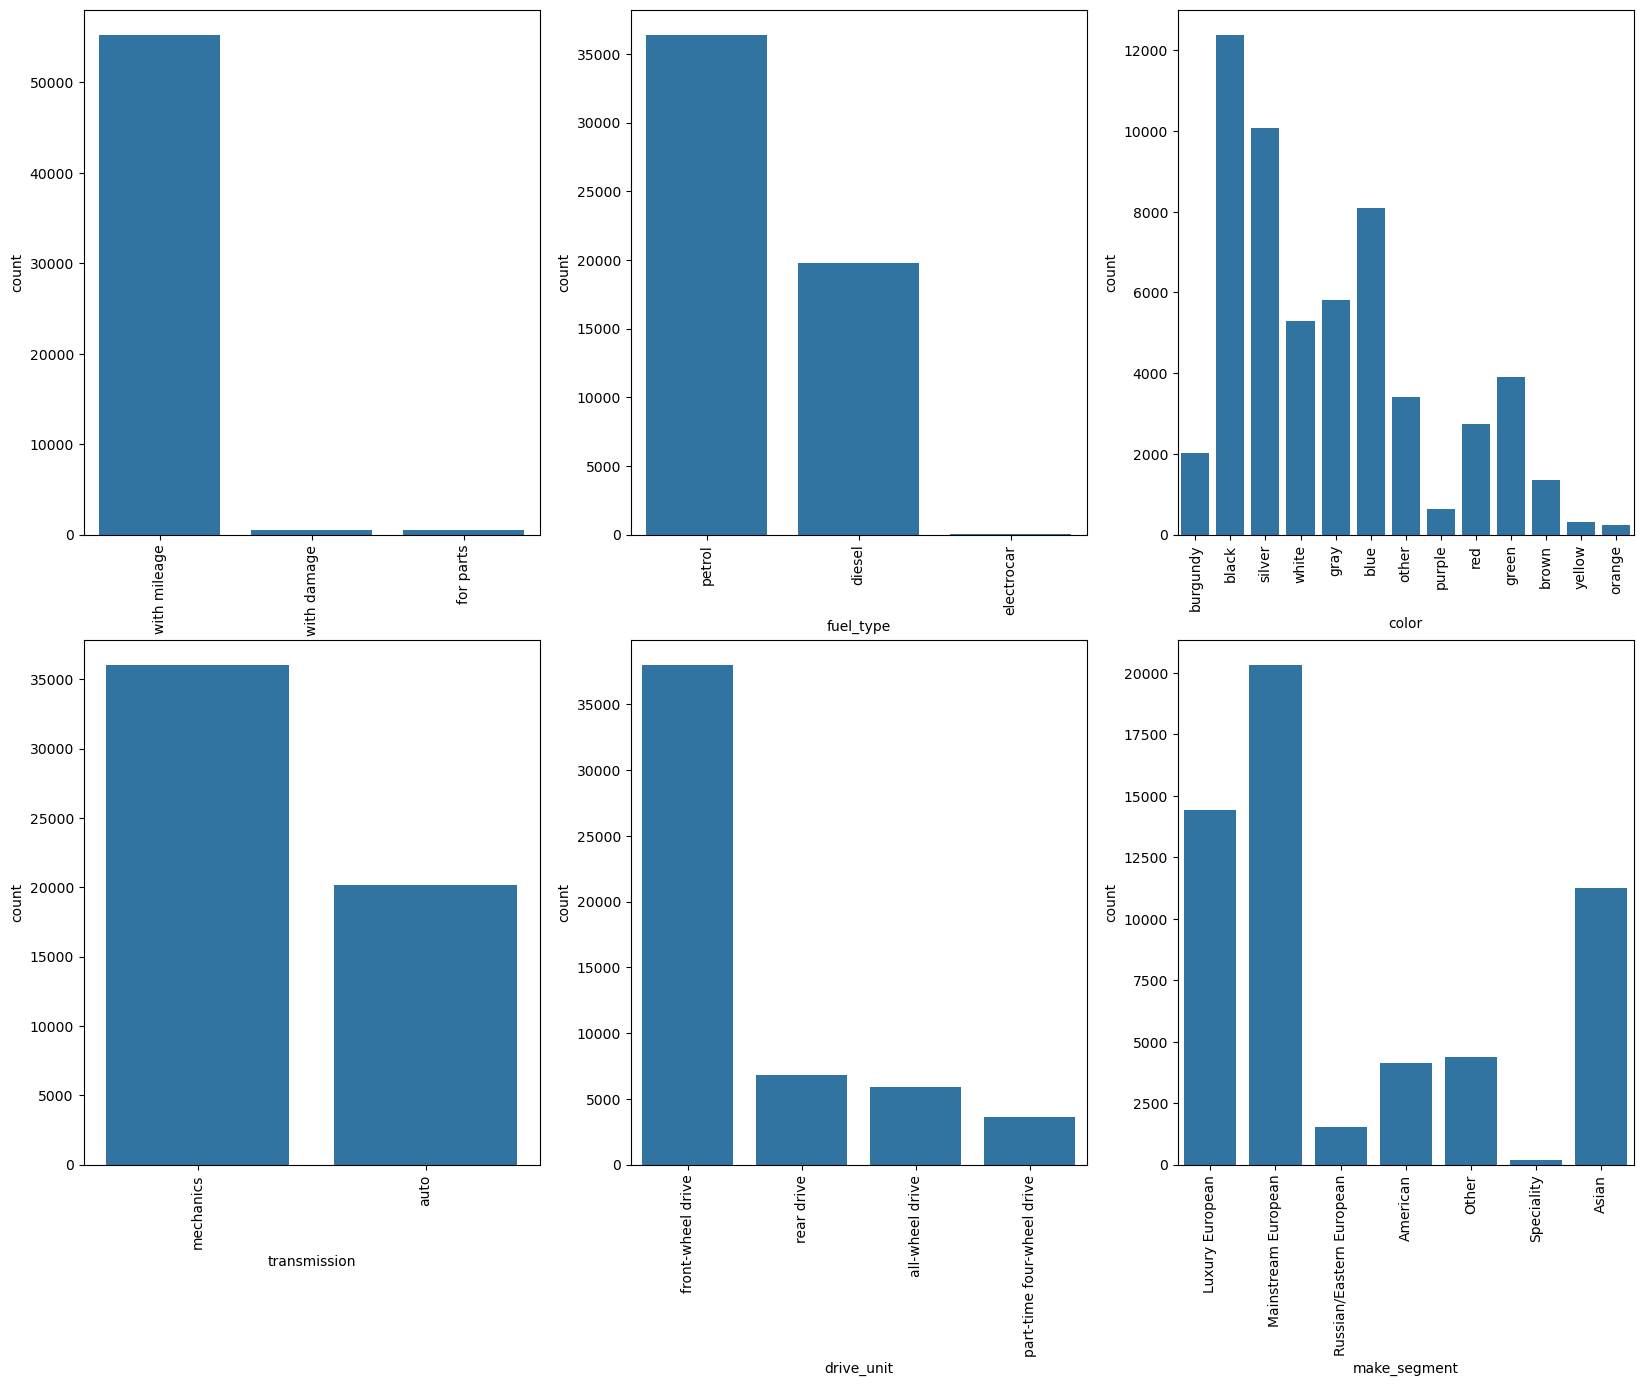

In [179]:
fig, ax= plt.subplots(2,3, figsize=(20,15))
axi=[ax[0,0],ax[0,1],ax[0,2],ax[1,0],ax[1,1],ax[1,2]]
c=0
for column in df.columns[1:]:
    if df[column].dtype=='O':
        sns.countplot(x=column,data=df,ax=axi[c])
        axi[c].tick_params(axis='x',rotation=90)
        c=c+1
        

From the above graphs, we can get an overview regarding the data across the categorical variables in the dataset. From above graphs it is clear that the majoority of the cars are being sold are in the working commdition, majority of them run on petrol, followed by the diesel and hardly any of them runs on the electricity. Most of the cars have manual transmission, with front wheel drive, having colors such as bklack, silver , blue white and grey.

## Continuous Varibale Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

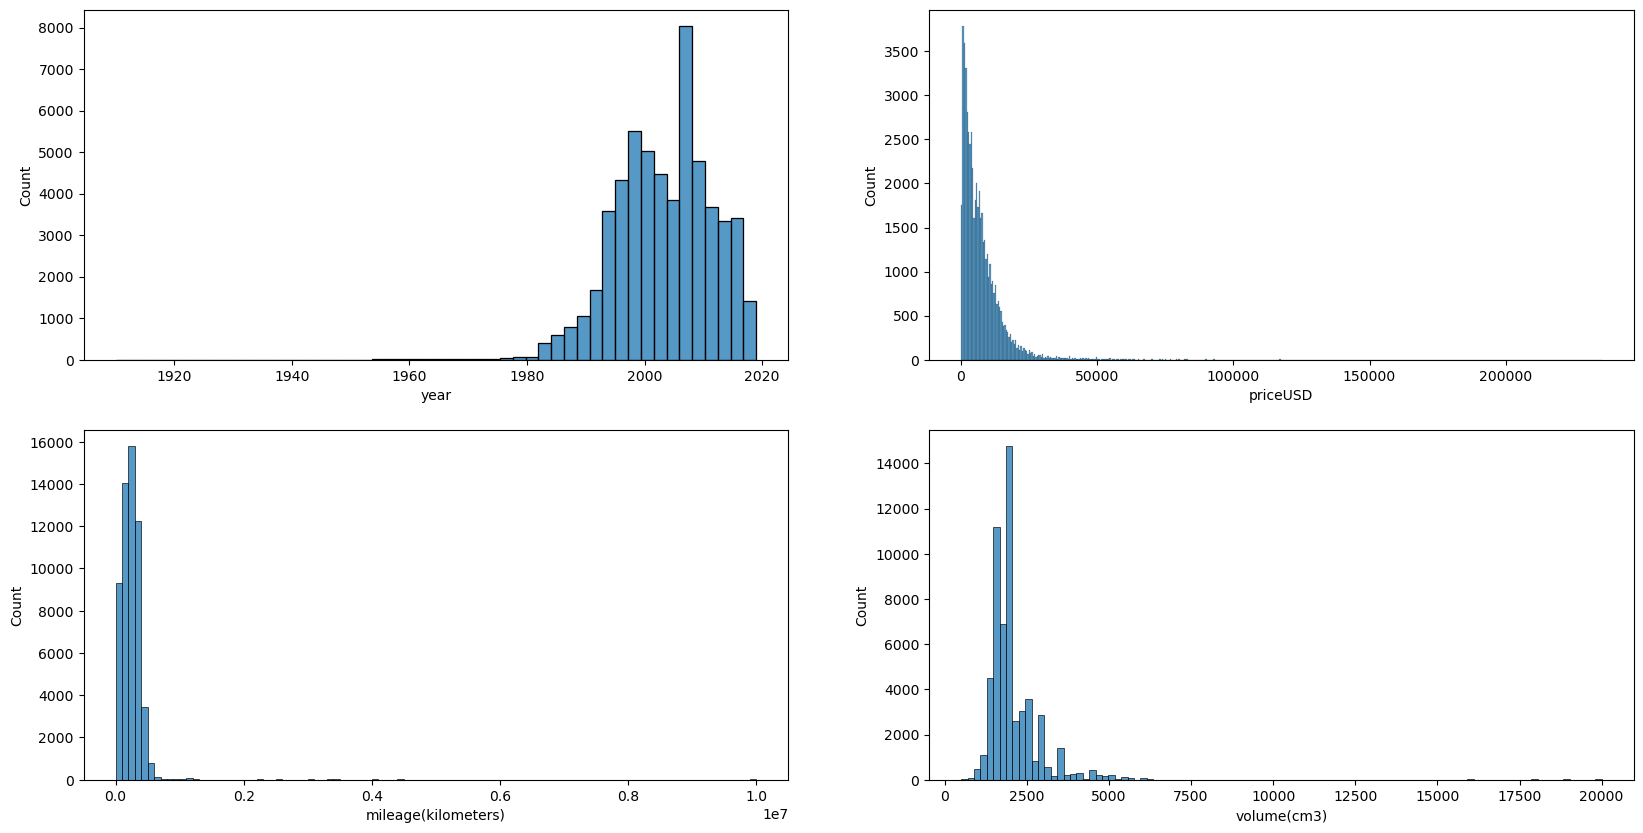

In [180]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

The above graphs shows the distribution of the data across continuous variables. Majority of the cars are manufactured between 1990 to 2019,having price less than 50k USD, mileage less than 1 million km, engine volume between 1750 to 2000 cm3.

Since most of the cars are manufactured after 1980, so I will only consider the cars manufactured after 1980.

In [181]:
df=df[df["year"]>1980]

In [182]:
df.sample(10)

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
27441,volkswagen,7700,2009,with mileage,148000.0,petrol,1600.0,gray,auto,front-wheel drive,Mainstream European
53893,bmw,18000,2009,with mileage,225000.0,diesel,3000.0,black,auto,all-wheel drive,Luxury European
30499,nissan,12100,2013,with mileage,88000.0,petrol,1600.0,red,auto,front-wheel drive,Asian
46830,opel,5500,2004,with mileage,211000.0,diesel,3000.0,blue,auto,front-wheel drive,Mainstream European
19415,kia,5550,2005,with mileage,250000.0,diesel,2900.0,black,mechanics,front-wheel drive,Asian
43733,mercedes-benz,39700,2013,with mileage,140000.0,petrol,5000.0,black,auto,all-wheel drive,Other
50991,volvo,2700,1998,with mileage,400000.0,diesel,1900.0,black,mechanics,front-wheel drive,Mainstream European
27407,volkswagen,999,1986,with mileage,300000.0,petrol,1300.0,burgundy,mechanics,front-wheel drive,Mainstream European
45847,renault,4750,2007,with mileage,303000.0,diesel,1900.0,gray,auto,front-wheel drive,Mainstream European
48992,fiat,599,1993,with mileage,298000.0,petrol,1400.0,blue,mechanics,NaN,Mainstream European


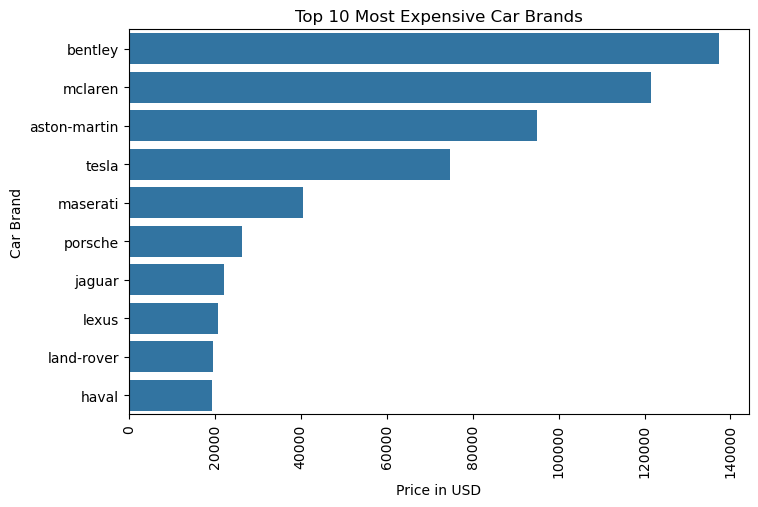

In [183]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Bentley, Mclaren, aston-martin, Tesla and meserati.

## Price and Condition

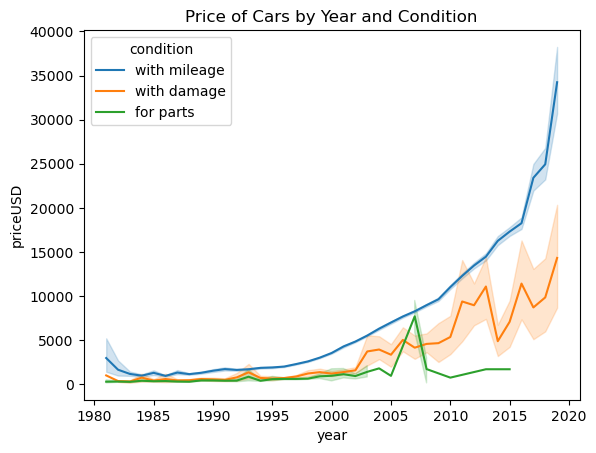

In [184]:
sns.lineplot(x='year', y='priceUSD', data= df, hue='condition')
plt.title("Price of Cars by Year and Condition")
plt.show()

This graph shows the relationship between the price and the year of the car along with selling codition of the car. Cars, which are sold in working condition, are more expensive and their price increased with time, having exponential increase between 2015 to 2020. Cars, which were damaged, had a similar price to tha cars which were sold for parts between 1980 to 2000. However, the price of the damaged cars increased significanlty after 2000. Cars, which were sold for parts, tend to have minimal price and their price increased very little with time.

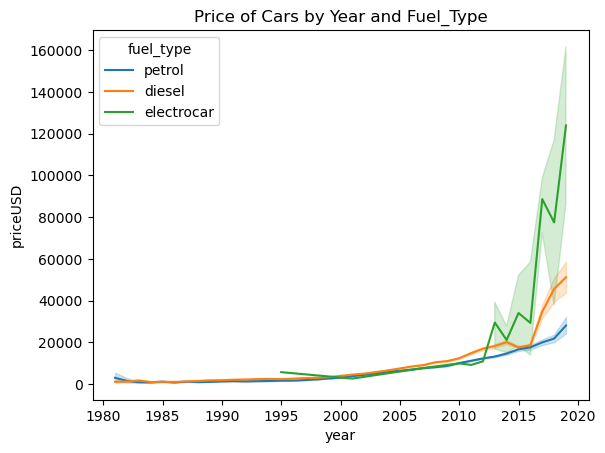

In [185]:
sns.lineplot(x="year",y="priceUSD", data=df, hue='fuel_type')
plt.title("Price of Cars by Year and Fuel_Type")
plt.show()

Till 2005, there was no major difference in car price of cars running on petrol and diesel. However, after 2015, the price of the cars running on petrol increased significantly, whereas the price of the cars running on diesel increased with a very small margin. The graph also highloghts the introducttion of electro cars, which runs on electricity in 1995. However, the price of the electro cars increases exponentially after 2015, having the highest car price based on fuel type

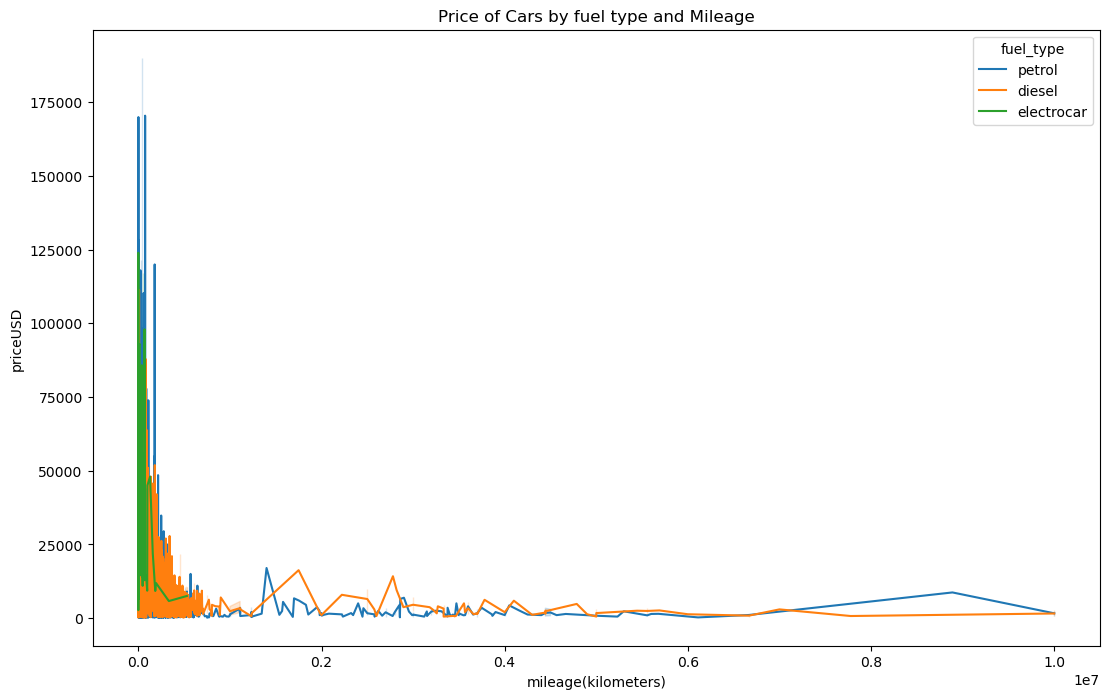

In [186]:
plt.figure(figsize=(13,8))
sns.lineplot(x="mileage(kilometers)",y="priceUSD", data=df, hue='fuel_type')
plt.title("Price of Cars by fuel type and Mileage")
plt.show()


The cars running on petrol and diesel have similar mileage, however their prices are quite different. The cars running on petrol tend to have higher price than the diesel ones. The cars running on electricity tend to have very high prices and low mileage.

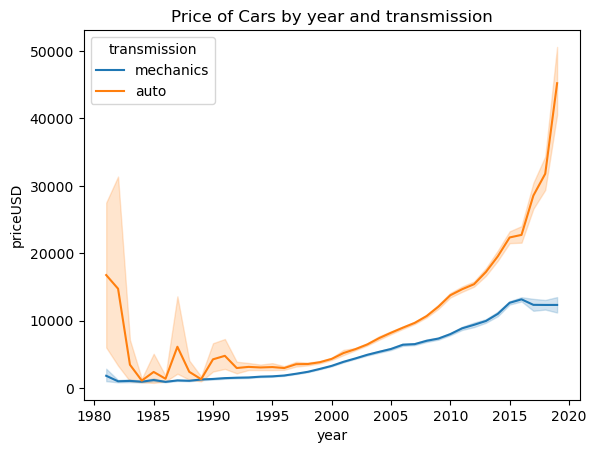

In [187]:
sns.lineplot (x='year', y='priceUSD', data=df, hue='transmission')
plt.title("Price of Cars by year and transmission")
plt.show()

This graph reveals the changes in the car price based on their transmission. The price of the cars with automatic transmission decreased significantly after 1983, however its price increased exponentially after 2000. However, the price of the cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2000.

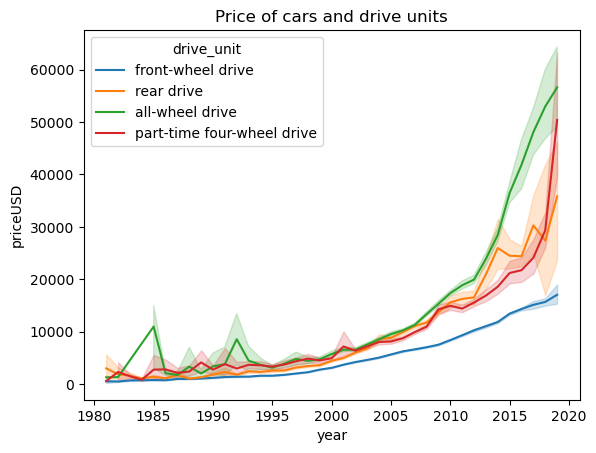

In [188]:
sns.lineplot(x='year', y='priceUSD', data=df, hue='drive_unit')
plt.title("Price of cars and drive units")
plt.show()

Between 1980 to 1995, there was not much difference in the price of the cars based on the drive unit. However after 1995, the price of the cars with front wheel drive increased at a slower pace as compared to other drive units. The price of the cats with all wheel drive increased significantly after 2005, having the highest price among all the drive units, followed by part-time four wheel drive and rear wheel drive.

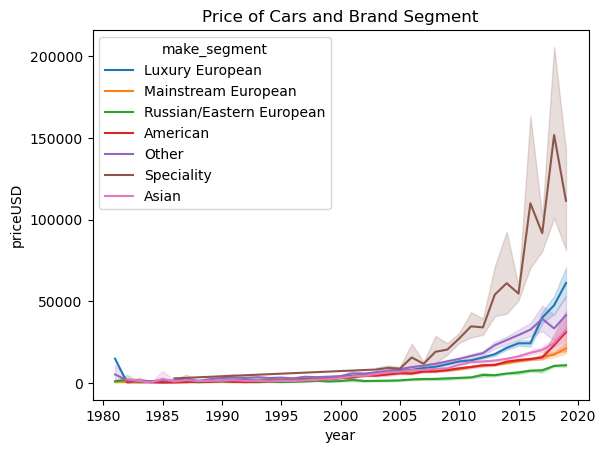

In [189]:
sns.lineplot(x='year', y='priceUSD', data=df, hue='make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

This graph shows the surge in car prices after 2005, where we can seen that the price of the specialty car segment increased significanlty followed by the luxury european car, American, Asian and Mainstream European car segment. The price of the Russian/Eastern European car segment increased at a slower pace as compared to other segments and is lowest among all the segments.

## Data Processing Part 2

In [190]:
#checking for the null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

In [191]:
df.shape

(55943, 11)

Since, the count of null values in small in comparison to that dataset size, I will be dropping the null values from the dataset.

In [192]:
df.dropna(inplace=True)

In [193]:
df.drop(columns=['make'], inplace= True)

## label encoding for object data type

In [194]:
from sklearn.preprocessing import LabelEncoder

#columns to encode
cols=['condition','fuel_type','transmission','color','drive_unit','make_segment']
le=LabelEncoder()

for col in cols:
    le.fit(df[col])
    df[col]= le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


## Correlation Matrix Heatmap

<Axes: >

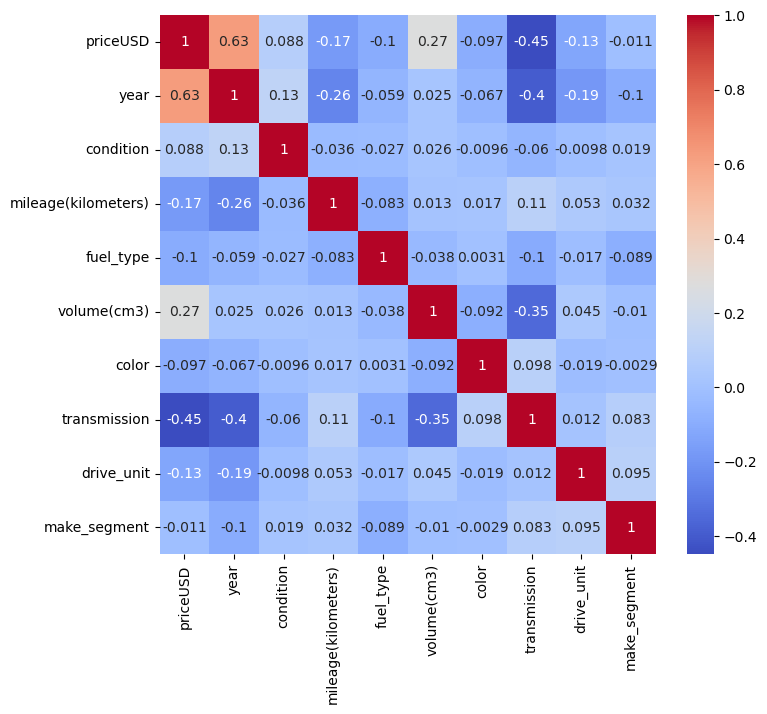

In [195]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

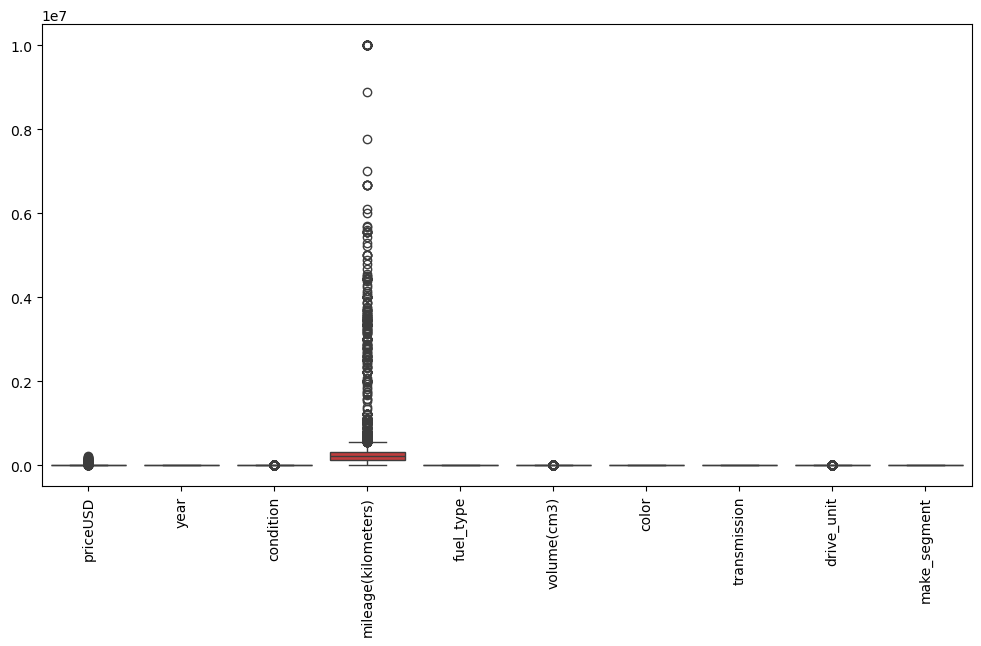

In [196]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

## Analyzing outliers digramatically using Boxplot

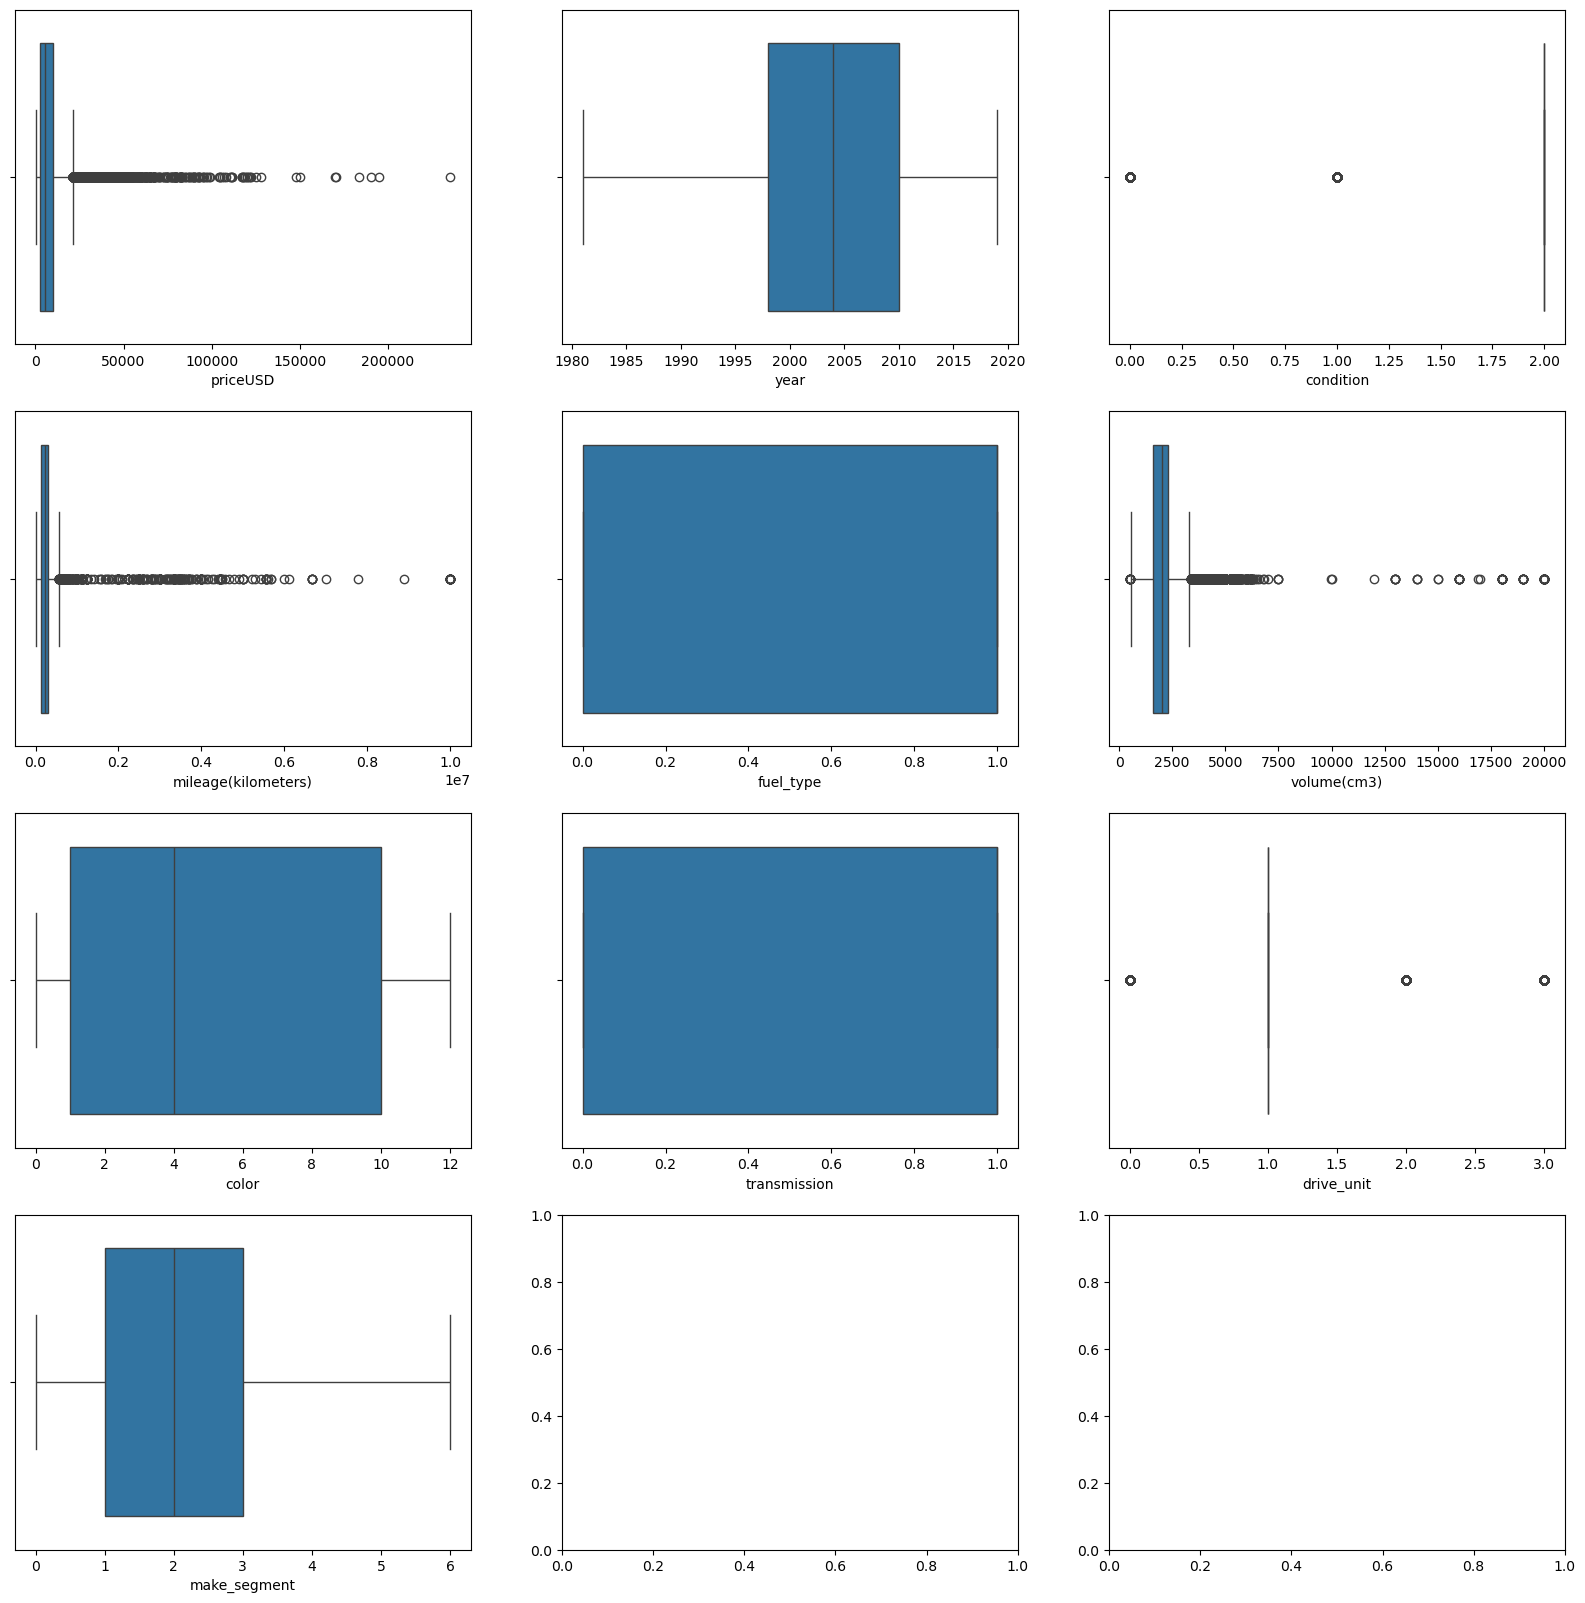

In [197]:
fig, ax= plt.subplots(4,3, figsize=(20,20))
axi=[ax[0,0],ax[0,1],ax[0,2],ax[1,0],ax[1,1],ax[1,2],ax[2,0],ax[2,1],ax[2,2],ax[3,0]]
c=0
for col in df.columns:
    sns.boxplot(x=df[col], ax=axi[c])
    c=c+1
    

## Analyzing Outliers mathematically using IQR

In [198]:
outlier_cols = []

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    if ((df[col] < lower) | (df[col] > upper)).any():
        outlier_cols.append(col)

print("Columns with outliers:", outlier_cols)


Columns with outliers: ['priceUSD', 'condition', 'mileage(kilometers)', 'volume(cm3)', 'drive_unit']


In [209]:
from scipy import stats


cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

z = np.abs(stats.zscore(df[cols]))

df = df[(z < 3).all(axis=1)]

In [210]:
df.shape

(53157, 10)

## Train Test Split

In [211]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['priceUSD'])
y=df['priceUSD']
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.2, random_state=42)

## Model Building

### Decision Tree Regressor

In [212]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()


### Hyperparameter Tuning Using GridSearchCV

In [214]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}

#Grid Search Object
grid=GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitiing the grid search
grid.fit(X_train, Y_train)


print(grid.best_params_)

    


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate

In [216]:
# creating the model with the best params 
dtr= DecisionTreeRegressor(max_depth= 8, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 2, random_state= 0)

#fitting the model
dtr.fit(X_train,Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [218]:
# training score
dtr.score(X_train, Y_train)

0.7714312698521457

In [219]:
y_pred= dtr.predict(X_test)

## Model Evaluation

In [221]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(Y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(Y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(Y_test, y_pred)))

R2 Score:  0.7323719772242405
Mean Squared Error:  16724525.35499311
Mean Absolute Error:  2090.3636168127196
Root Mean Squared Error:  4089.562978484756


## Feature Importance

In [222]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.303898
6,transmission,0.277024
2,mileage(kilometers),0.210757
4,volume(cm3),0.105647
3,fuel_type,0.044626
7,drive_unit,0.035297
8,make_segment,0.015291
5,color,0.006633
1,condition,0.000827


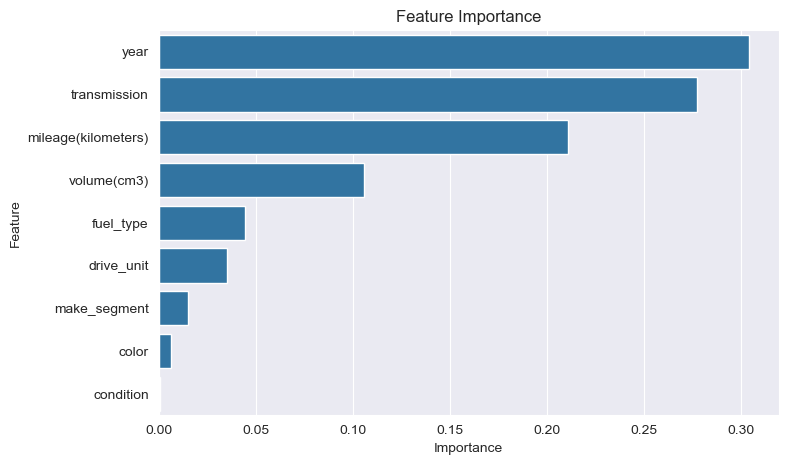

In [223]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

## Conclusion

The aim of this project was to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. During the exploratory data analysis, it was found that there has been a significant increase in car prices in Belarus after the year 2000. The cars which runs on petrol have automatic transmission have higher price has compared to diesel cars with manual transmission. However, the elctric cars are distinctively expensive than the other cars. The cars with all wheel drive have the highest price among all the drive units. The speciality segment cars have the highest price among all the segments followed by luxury european, american, asian car segments.

The decision tree regressor model was used to predict the car price. The model was able to predict the car price with 85.29% accuracy. The most important features for predicting the car price were found to be year and volume of the engine.